# Frequent Itemsets and Association Rules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import fpgrowth, fpmax, association_rules

## (a)

In [2]:
data = pd.read_csv('./frequent_itemsets_and_association_rules/online_retail.csv', sep=';', decimal=',')
display(data.head())
display(data.info())

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536370,ALARM CLOCK BAKELIKE PINK,24,01.12.2010 08:45,3.75,12583.0,France
1,536370,ALARM CLOCK BAKELIKE RED,24,01.12.2010 08:45,3.75,12583.0,France
2,536370,ALARM CLOCK BAKELIKE GREEN,12,01.12.2010 08:45,3.75,12583.0,France
3,536370,PANDA AND BUNNIES STICKER SHEET,12,01.12.2010 08:45,0.85,12583.0,France
4,536370,STARS GIFT TAPE,24,01.12.2010 08:45,0.65,12583.0,France


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29313 entries, 0 to 29312
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      29313 non-null  int64  
 1   Itemname    29313 non-null  object 
 2   Quantity    29313 non-null  int64  
 3   Date        29313 non-null  object 
 4   Price       29313 non-null  float64
 5   CustomerID  29208 non-null  float64
 6   Country     29313 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


None

                   Itemname  SalesValuePerItem
0                   POSTAGE            59489.5
1  REGENCY CAKESTAND 3 TIER            18961.8
2        RABBIT NIGHT LIGHT            18836.0

The total sales value is:  983566.6499999999
        Country  SalesValuePerCountry
0   Netherlands             285446.34
1       Germany             228867.14
2        France             209715.11
3         Spain              61577.11
4       Belgium              41196.34
5        Sweden              38378.33
6        Norway              36165.44
7      Portugal              33747.10
8         Italy              17483.24
9       Austria              10198.68
10       Poland               7334.65
11       Greece               4760.52
12      Iceland               4310.00
13        Malta               2725.59
14    Lithuania               1661.06


C:\Users\ferey\AppData\Local\Temp\ipykernel_13616\2172641125.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  SalesValuePerItem = data.groupby('Itemname', group_keys=False).apply(lambda x: (x['Quantity'] * x['Price']).sum())
C:\Users\ferey\AppData\Local\Temp\ipykernel_13616\2172641125.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  SalesValuePerCountry = data.groupby('Country', group_keys=False).app

<BarContainer object of 15 artists>

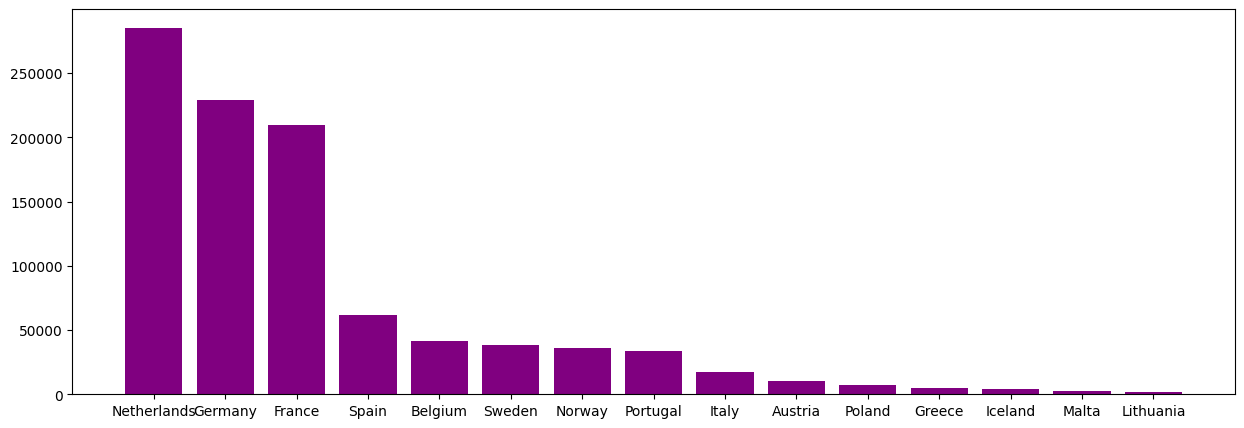

In [3]:
# Calculate the total sales value for each item 
SalesValuePerItem = data.groupby('Itemname', group_keys=False).apply(lambda x: (x['Quantity'] * x['Price']).sum())
SortedSalesValuePerItem = SalesValuePerItem.sort_values(ascending=False).reset_index(name='SalesValuePerItem')

# Display the top 3 items with the highest sales value
print(SortedSalesValuePerItem.head(3))
  
#Calculate the total sales value
SumOfSalesValue = SalesValuePerItem.sum()
print("\nThe total sales value is: ", SumOfSalesValue)

# Calculate the total sales value for each country
SalesValuePerCountry = data.groupby('Country', group_keys=False).apply(lambda x: (x['Quantity'] * x['Price']).sum())
SortedSalesValuePerCountry = SalesValuePerCountry.sort_values(ascending=False).reset_index(name='SalesValuePerCountry')
print(SortedSalesValuePerCountry)

# Plot the total sales value for each country
plt.figure(figsize=(15, 5))
plt.bar(SortedSalesValuePerCountry['Country'], SortedSalesValuePerCountry['SalesValuePerCountry'], color='purple')

## (b)

In [4]:
# Create a transaction for each BillNo
transactions = data.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().fillna(0).astype(bool)
transaction_attributes = data.groupby('BillNo')[['Date', 'CustomerID', 'Country']].first()
display(transactions.head())
display(transaction_attributes.head())
n_transactions = transactions.shape[0]

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,...,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER
BillNo,,,,,,,,,,,,,,,,,,,,,
536370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536403,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536532,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,Date,CustomerID,Country
BillNo,,,
536370,01.12.2010 08:45,12583.0,France
536403,01.12.2010 11:27,12791.0,Netherlands
536527,01.12.2010 13:04,12662.0,Germany
536532,01.12.2010 13:24,12433.0,Norway
536840,02.12.2010 18:27,12738.0,Germany


Number of transactions:  1357


,Itemname,Support
0,POSTAGE,0.724392
1,ROUND SNACK BOXES SET OF4 WOODLAND,0.196021
2,REGENCY CAKESTAND 3 TIER,0.137067


<BarContainer object of 2489 artists>

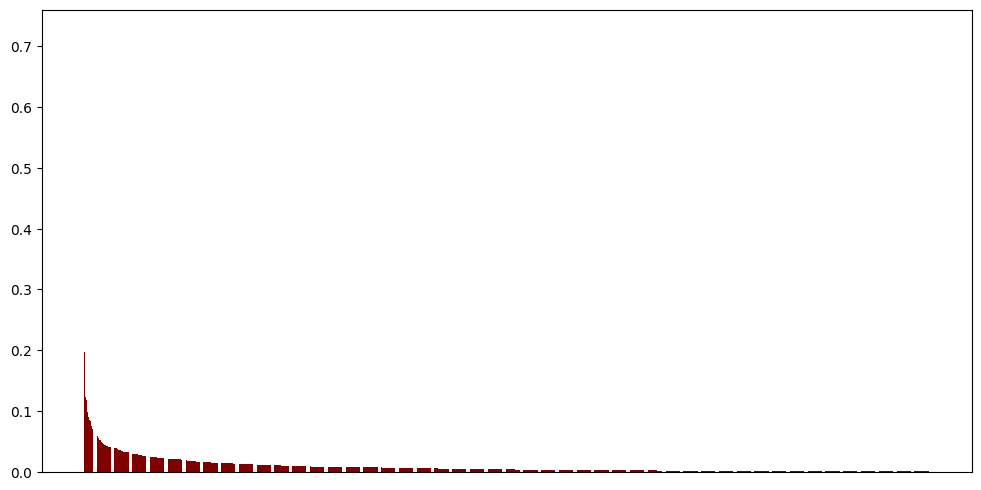

In [5]:
# Your code here
# Number of transactions contained in the dataset
print("Number of transactions: ", n_transactions)

# Support of each item
item_support = transactions.sum(axis=0) / n_transactions
item_support = item_support.sort_values(ascending=False).reset_index(name='Support')
display(item_support.head(3))

#Remove the first row which is the most frequent item
item_support_ = item_support.iloc[1:]
# Plot the bar chart for the support of each item
plt.figure(figsize=(12, 6))
plt.xticks([])
plt.bar(item_support['Itemname'], item_support['Support'], color='maroon')

## (c)

In [6]:
#(1 point) Do the three items that occur most frequent across all transactions differ
#from the three items that generated the highest sales values? Explain why this is/is
#not the case.

# Yes, they are not the same although they containt mutual items (which is not in the same rank). The most frequent items are counted by the number of transactions that contain them
# without considering the count of that item in each transacion.
# On the other hand, the highest sales values are calculated based on the item's price and quantity.
# Usually the most frequent items are the items that have the lowest price and are sold in high quantities.
# So, the most frequent items are not necessarily the items that generated the highest sales values.

## (d)

In [ ]:
# Your code here
# Increase overall display width to see the itemsets better
pd.set_option('display.width', 1000)       

# Mining frequent itemsets with a minimum support of 1% and sorting them by support in descending order
frequent_itemsets = fpgrowth(transactions, min_support=0.01, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, inplace=True)
print(frequent_itemsets)

# The three most frequent itemsets which include at least three items and their support values
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)
frequent_itemsets_of_length_above_3 = frequent_itemsets[(frequent_itemsets['length'] > 2)]
frequent_itemsets_of_length_above_3 = frequent_itemsets_of_length_above_3.sort_values(by='support', ascending=False).reset_index(drop=True)
print(frequent_itemsets_of_length_above_3.head(3))

       support                                           itemsets
0     0.724392                                          (POSTAGE)
1     0.196021               (ROUND SNACK BOXES SET OF4 WOODLAND)
580   0.162859      (POSTAGE, ROUND SNACK BOXES SET OF4 WOODLAND)
107   0.137067                         (REGENCY CAKESTAND 3 TIER)
25    0.135593                 (PLASTERS IN TIN WOODLAND ANIMALS)
...        ...                                                ...
2901  0.010317         (POSTAGE, AIRLINE BAG VINTAGE JET SET RED)
2912  0.010317  (LUNCH BOX WITH CUTLERY RETROSPOT, LUNCH BAG D...
2914  0.010317  (PLASTERS IN TIN CIRCUS PARADE, LUNCH BAG DOLL...
2917  0.010317  (POSTAGE, LUNCH BAG RED RETROSPOT, LUNCH BAG D...
2922  0.010317  (POSTAGE, LUNCH BAG WOODLAND, LUNCH BAG SPACEB...

[4108 rows x 2 columns]
    support                                           itemsets  length
0  0.080324  (POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS, R...       3
1  0.053795  (POSTAGE, PLASTERS IN TIN WO

## (e)

In [8]:
# Your code here
# Mining maximal frequent itemsets with a minimum support of 1% in a sorted order
maximal_frequent_itemsets = fpmax(transactions, min_support=0.01, use_colnames=True)
maximal_frequent_itemsets.sort_values(by='support', ascending=False, inplace=True)
print(maximal_frequent_itemsets)

# The three most frequent maximal itemsets which include at least three items and their support values
maximal_frequent_itemsets['length'] = maximal_frequent_itemsets['itemsets'].apply(len)
maximal_frequent_itemsets_of_length_above_3 = maximal_frequent_itemsets[(maximal_frequent_itemsets['length'] > 2)]
maximal_frequent_itemsets_of_length_above_3 = maximal_frequent_itemsets_of_length_above_3.sort_values(by='support', ascending=False).reset_index(drop=True)
print(maximal_frequent_itemsets_of_length_above_3.head(3))

       support                                       itemsets
1012  0.032424         (POSTAGE, 4 TRADITIONAL SPINNING TOPS)
918   0.028740     (POSTAGE, SET OF 4 KNICK KNACK TINS DOILY)
950   0.027266  (POSTAGE, SET OF 60 PANTRY DESIGN CAKE CASES)
833   0.026529       (POSTAGE, ASSORTED COLOUR BIRD ORNAMENT)
1089  0.025792  (POSTAGE, SET OF 72 RETROSPOT PAPER  DOILIES)
...        ...                                            ...
23    0.010317                          (RED RETROSPOT APRON)
24    0.010317                   (COTTON APRON PANTRY DESIGN)
25    0.010317                 (CHRISTMAS LIGHTS 10 REINDEER)
26    0.010317            (RED 3 PIECE RETROSPOT CUTLERY SET)
27    0.010317                     (HOME BUILDING BLOCK WORD)

[2031 rows x 2 columns]
    support                                           itemsets  length
0  0.022108  (POSTAGE, RABBIT NIGHT LIGHT, RED TOADSTOOL LE...       3
1  0.020634  (POSTAGE, RABBIT NIGHT LIGHT, ROUND SNACK BOXE...       3
2  0.020634  (BLUE

In [9]:
# Compare the three most frequent maximal itemsets including at least three items
#and their support to the resulting itemsets of part (d). Briefly explain the differences.

# The three most frequent maximal itemsets (from part (e)) have lower support than the frequent itemsets (from part (d)) because maximal 
# itemsets are the largest itemsets that can't be extended while remaining frequent. Frequent itemsets include all combinations above the minimum 
# support threshold, and adding items typically decreases support, which is why maximal itemsets tend to have lower support.

## (f)

In [10]:
# Add a column for the length of each itemset
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)

# Filter frequent itemsets with length >= 6 and minimum support >= 0.01
frequent_itemsets_of_length_above_6 = frequent_itemsets[
    (frequent_itemsets['length'] >= 6) & (frequent_itemsets['support'] >= 0.01)
]

# Printing the number of frequent itemsets of length >= 6 and support >= 0.01
print("Number of Frequent Itemsets (Length >= 6 and Support > 1%):")
print(frequent_itemsets_of_length_above_6['length']
      .value_counts()
      .sort_index()
      .reset_index(name='Number of Frequent Itemsets'))

# Identify closed frequent itemsets
# A frequent itemset is closed if there is no superset with the same support
frequent_itemsets_of_length_above_6['is_closed'] = frequent_itemsets_of_length_above_6.apply(
    lambda row: not any(
        (row['itemsets'] < other['itemsets']) and (row['support'] == other['support'])
        for _, other in frequent_itemsets_of_length_above_6.iterrows()
    ),
    axis=1
)
closed_frequent_itemsets = frequent_itemsets_of_length_above_6[
    frequent_itemsets_of_length_above_6['is_closed']
]

# Printing the number of closed frequent itemsets of length >= 6 and support >= 0.01
print("Number of Closed Frequent Itemsets (Length >= 6 and Support > 1%):")
print(closed_frequent_itemsets['length']
      .value_counts()
      .sort_index()
      .reset_index(name='Number of Closed Frequent Itemsets'))

# Identify maximal frequent itemsets
# A frequent itemset is maximal if it has no superset in the frequent itemsets
frequent_itemsets_of_length_above_6['is_maximal'] = frequent_itemsets_of_length_above_6.apply(
    lambda row: not any(
        (row['itemsets'] < other['itemsets'])
        for _, other in frequent_itemsets_of_length_above_6.iterrows()
    ),
    axis=1
)

# Create the maximal_frequent_itemsets DataFrame
maximal_frequent_itemsets_of_length_above_6 = frequent_itemsets_of_length_above_6[
    frequent_itemsets_of_length_above_6['is_maximal']
]

# Printing the number of maximal frequent itemsets of length >= 6 and support >= 0.01
print("Number of Maximal Frequent Itemsets (Length >= 6 and Support > 1%):")
print(maximal_frequent_itemsets_of_length_above_6['length']
      .value_counts()
      .sort_index()
      .reset_index(name='Number of Maximal Frequent Itemsets'))


Number of Frequent Itemsets (Length >= 6 and Support > 1%):
   length  Number of Frequent Itemsets
0       6                            8
1       7                            1
Number of Closed Frequent Itemsets (Length >= 6 and Support > 1%):
   length  Number of Closed Frequent Itemsets
0       6                                   5
1       7                                   1
Number of Maximal Frequent Itemsets (Length >= 6 and Support > 1%):
   length  Number of Maximal Frequent Itemsets
0       6                                    1
1       7                                    1


C:\Users\ferey\AppData\Local\Temp\ipykernel_13616\3482355462.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequent_itemsets_of_length_above_6['is_closed'] = frequent_itemsets_of_length_above_6.apply(
C:\Users\ferey\AppData\Local\Temp\ipykernel_13616\3482355462.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequent_itemsets_of_length_above_6['is_maximal'] = frequent_itemsets_of_length_above_6.apply(


## (g)

In [22]:
# Your code here

# Increase overall display width to see the itemsets better
pd.set_option('display.width', 1000)    

# (3 points) Based on all frequent itemsets (with a minimum support of 1%), determine all association rules with a minimum 
# confidence of 0.5. 

frequent_itemsets = fpgrowth(transactions, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
rules = rules.sort_values(by='confidence', ascending=False).reset_index(drop=True)

# Display the association rules and their support and confidence values in descending order of confidence
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
print(rules)


                                            antecedents                                        consequents   support  confidence       lift
0     (SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS ...                         (DOLLY GIRL CHILDRENS CUP)  0.022108         1.0  31.558140
1     (POSTAGE, SPACEBOY CHILDRENS BOWL, SPACEBOY CH...                        (DOLLY GIRL CHILDRENS BOWL)  0.014738         1.0  29.500000
2     (ROUND SNACK BOXES SET OF 4 FRUITS, ASSORTED C...                                          (POSTAGE)  0.011054         1.0   1.380468
3     (PACK OF 6 SKULL PAPER PLATES, SET/20 RED RETR...                    (SET/6 RED SPOTTY PAPER PLATES)  0.015475         1.0  14.912088
4     (POSTAGE, SET/6 RED SPOTTY PAPER PLATES, PACK ...                      (SET/6 RED SPOTTY PAPER CUPS)  0.016212         1.0  14.591398
...                                                 ...                                                ...       ...         ...        ...
5691                

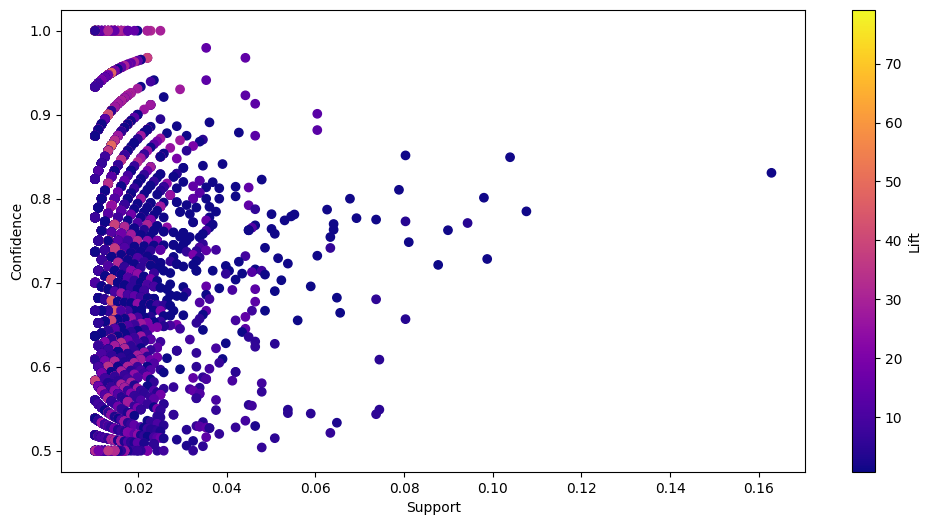

In [39]:
# Provide a scatter plot of your result where the resulting association rules are represented by points. 
# Use the x-axis for the support, the y-axis for the confidence, and the color for the lift.

plt.figure(figsize=(12, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='plasma')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar().set_label('Lift')
plt.show()

## (h)

In [13]:
# Your code here

## (i)

In [14]:
# Your code here

## (j)

In [15]:
# Your code here